In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy.random as r
from tqdm import tqdm
from mpmath import nsum, exp, inf, tanh


In [2]:
#theoretical scaling function to be checked numerically
def f(z):
    s=nsum(lambda n: np.pi*((-1)**(n))*(2*n+1)*exp(-(np.pi**2)*((2*n+1)**2)*z/(4)), [0, inf])
    return s

100%|██████████████████████████████████| 100000/100000 [08:36<00:00, 193.50it/s]


(0.0, 3.0)

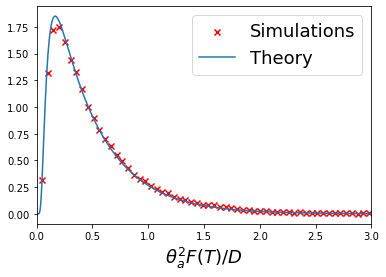

In [3]:
n_rep=10**(5)#number of samples

data=[]

D=1 #rotational diffusion constant
xc=1 
v0=1 #speed
dt=0.0005 #timestep
theta_a=1 #activation angle

for _ in tqdm(range(n_rep)):
    #Langevin dynamics
    x=0
    t=0
    while np.abs(x)<theta_a:
        x=x+np.sqrt(2*D*dt)*r.normal()
        t=t+dt
    data.append(t)

hist, bins = np.histogram(data, bins=100, density=True)  # You can adjust the number of bins as needed

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.scatter(bin_centers, hist, label='Simulations',marker='x',color='red')

x_th=np.linspace(0,3,500)
y_th=[D*f(D*T/theta_a**2)/(theta_a**2) for T in x_th]

plt.plot(x_th,y_th,label='Theory')

plt.legend(fontsize=18)
plt.xlabel(r'$DT/\theta_a^2$',fontsize=18)
plt.xlabel(r'$\theta_a^2 F(T)/D$',fontsize=18)
plt.xlim(0,3)